In [1]:
import os
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir('drive/MyDrive/xray_lung')

In [5]:
os.listdir()

['image_segmentation',
 'train_original_mini_Unet_4classes-with_classweight.ipynb',
 'Montgomery',
 'Shenzhen',
 'EDA_preprocess.ipynb']

In [6]:
montgomery_Xray_path = 'Montgomery/CXR_png'
montgomery_masks_path = 'Montgomery/ManualMask'
montgomery_Xray = glob.glob(f'{montgomery_Xray_path}/*png')
montgomery_left_masks = glob.glob(f'{montgomery_masks_path}/leftMask/*png')
montgomery_right_masks= glob.glob(f'{montgomery_masks_path}/rightMask/*png')
print(len(montgomery_Xray))
print(len(montgomery_left_masks))
print(len(montgomery_right_masks))

138
138
138


(4892, 4020)


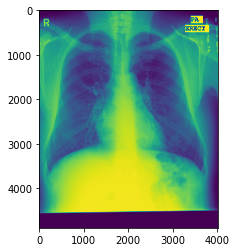

left (array([0., 1.]), array([16723561,  2942279]))
(4892, 4020)


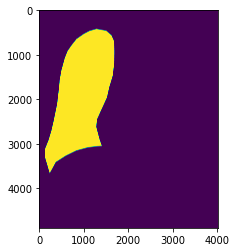

right (array([0., 1.]), array([16916438,  2749402]))
(4892, 4020)


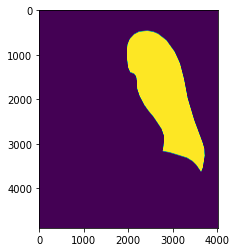

res (array([0.     , 0.03125, 0.0625 , 0.125  , 0.25   , 0.5    ]), array([13974159,     2098,   260679,  2099189,  2819432,   510283]))


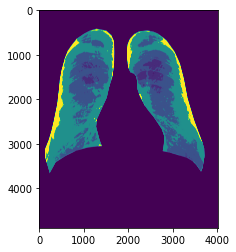

In [7]:
#Read file
index = 51
img = cv2.imread(montgomery_Xray[index], 0)/255
# print('img', np.unique(img, return_counts = True))

print(img.shape)
plt.imshow(img)
plt.show()

left_mask = cv2.imread(montgomery_left_masks[index], 0)/255.
print('left', np.unique(left_mask, return_counts = True))
print(left_mask.shape)
plt.imshow(left_mask)
plt.show()

right_mask = cv2.imread(montgomery_right_masks[index], 0)/255.
# right_mask = np.int(right_mask)
print('right', np.unique(right_mask, return_counts = True))
print(right_mask.shape)
plt.imshow(right_mask)
plt.show()

full_mask = right_mask + left_mask
res = cv2.bitwise_and(img, full_mask)#, mask = right_mask)
print('res', np.unique(res, return_counts = True))
plt.imshow(res)
plt.show()


In [8]:
data = []
montgomery_Xray.sort()
for file in montgomery_Xray:
  img = cv2.imread(file)/255.
  data.append(img)
data = np.array(data)
print(data.shape)
np.save('data.npy')

KeyboardInterrupt: ignored

In [ ]:
target = []
montgomery_left_masks.sort()
montgomery_right_masks.sort()
for index, file in enumerate(montgomery_right_masks):
  left = cv2.imread(montgomery_left_masks[index], 0)/255.
  right = cv2.imread(montgomery_right_masks[index], 0)/255.
  full = left + right
  target.append(full)
target = np.array(target)
print(target.shape)
np.save('target.npy')